In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from time import perf_counter

### Zadanie 1 FFT

#### Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera $F_n$ i nelementowego wektora wejściowego ($y = F_nx$).

In [3]:
def DFT(x):
    n = len(x)
    y = [0 for _ in range (n)]
    for j in range(n):
        for k in range(n):
            y[j] += x[k] * np.exp(-2j*math.pi*j*k/n)
    return y

#### Zaimplementuj również IDFT korzystając z tożsamosci  $F_{n}^{-1}y = \frac{\bar{F_{n}\bar{y}}}{n}$

In [4]:
def IDFT(y):
    n = len(y)
    x = [0 for _ in range (n)]
    for j in range(n):
        for k in range(n):
            x[j] += y[k] * np.exp(2j*math.pi*j*k/n)
        x[j] /= n
    return x

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

In [5]:
X = [1,1,2,1,1]

print("Zaimplementowane")
for x in IDFT(DFT(X)):  
    print(x)
    
print()
print("Numpy")
for x in np.fft.ifft(np.fft.fft(X)):  
    print(x)


Zaimplementowane
(1-2.664535259100376e-16j)
(1-6.66133814775094e-17j)
(2-2.2204460492503132e-17j)
(1+8.881784197001253e-17j)
(1+2.4424906541753446e-16j)

Numpy
(1.0000000000000004+0j)
(1+0j)
(2+0j)
(0.9999999999999999+0j)
(1+0j)


**Wniosek:** Algorytmy działają poprawnie. Różnica w powyższych wynikach powstała najprawdopodobniej z niedokładności arytmetyki zmiennoprzecinkowej.

#### Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT)

In [6]:
def FFT(x):
    x = np.asarray(x, dtype=complex)
    n = len(x)
    if n <= 1:
        return x
    even = FFT(x[0::2])
    odd =  FFT(x[1::2])
    t = [np.exp(-2j*math.pi*k/n) * odd[k] for k in range(n//2)]
    return np.array([even[k] + t[k] for k in range(n//2)] + [even[k] - t[k] for k in range(n//2)])

In [7]:
X=[1,1,1,1]
print(FFT(X))
print(np.fft.fft(X))

[4.+0.j 0.+0.j 0.+0.j 0.+0.j]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j]


Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_n$ dla danych o różnym rozmiarze.

In [8]:
def measureTime(X):
    start = perf_counter()
    DFT(X)
    end = perf_counter()
    dftTime = end - start

    start = perf_counter()
    FFT(X)
    end = perf_counter()
    fftTime = end - start

    start = perf_counter()
    np.fft.fft(X)
    end = perf_counter()
    numpyTime = end - start

    print("Times for set with length:",len(X))
    print("DFT:",dftTime)
    print("FFT:",fftTime)
    print("Numpy:",numpyTime,"\n")

In [9]:
for i in [8,512,1024,2048]:
    X = [np.random.randint(0,100) for _ in range(i)]
    measureTime(X)

Times for set with length: 8
DFT: 0.0001485000000016612
FFT: 9.610000000037644e-05
Numpy: 4.660000000100695e-05 

Times for set with length: 512
DFT: 0.5114927000000016
FFT: 0.00847299999999862
Numpy: 0.00010200000000182285 

Times for set with length: 1024
DFT: 2.0494166999999983
FFT: 0.01804650000000052
Numpy: 0.00013969999999829952 

Times for set with length: 2048
DFT: 8.0747185
FFT: 0.03860029999999881
Numpy: 0.00019929999999845904 



**Wniosek:** Dla wektorów o małej ilości elementów zaimplementowany FFT prawie tak szybki jak funkcja biblioteczna. Dla dużych wektorów różnica czasu wykonania zwiększa się (Numpy - najszybszy, DFT - najwolniejszy)

### Zadanie 2 DFT w 1D

#### Wygeneruj dwa sygnały czasowo-amplitudowe:  

a\) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach  
b\)  Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości


In [10]:
t = np.linspace(0, 1, 512, endpoint=False)
signals = [np.sin(np.pi*t), np.sin(2*np.pi*t), np.sin(3*np.pi*t), np.sin(4*np.pi*t), np.sin(5*np.pi*t)]
# for sig in signals:
#     plt.plot(t, sig)
#     plt.show()

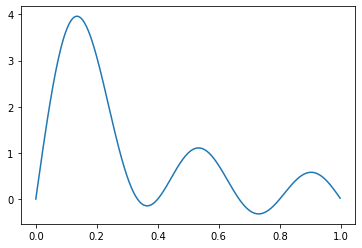

In [11]:
signal1 = sum(signals)
plt.plot(t, signal1)
plt.show()

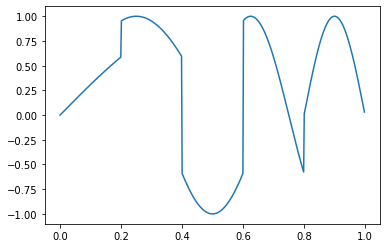

In [12]:
signal2 = [_ for _ in range(512)]
for i,lin in enumerate(t):
    if lin <= 0.2:
        signal2[i] = signals[0][i]
    elif lin <= 0.4:
        signal2[i] = signals[1][i]
    elif lin <= 0.6:
        signal2[i] = signals[2][i]
    elif lin <= 0.8:
        signal2[i] = signals[3][i]
    elif lin <= 1:
        signal2[i] = signals[4][i]


plt.plot(t, signal2)
plt.show()

Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część
urojoną wyniku transformacji.

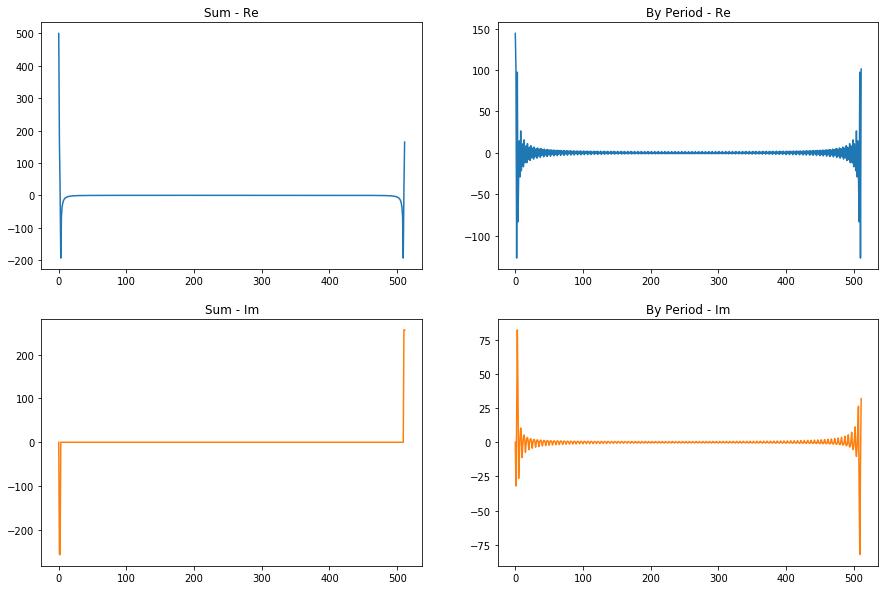

In [13]:
a = FFT(signal1)
b = FFT(signal2)

fig, axs = plt.subplots(2, 2,figsize=(15, 10))
axs[0, 0].plot(a.real)
axs[0, 0].set_title('Sum - Re')
axs[0, 1].plot(b.real)
axs[0, 1].set_title('By Period - Re')
axs[1, 0].plot(a.imag,c='C1')
axs[1, 0].set_title('Sum - Im')
axs[1, 1].plot(b.imag,c='C1')
axs[1, 1].set_title('By Period - Im')

plt.show()